<a href="https://colab.research.google.com/github/devrajsoni1/StartingWithPython-ai1-fall2019/blob/master/mnist_keras_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# taken from lukas/ml-class
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.callbacks import Callback
import json

# from wandb.keras import WandbCallback
# import wandb

# run = wandb.init()
# config = run.config







Using TensorFlow backend.


In [2]:
1+1


2

### Hello World

1. One
2. Two
3. Three

- Hello 
- World 

Hello the $\alpha$ is a greek letter
$$\alpha + \beta + \gamma = \delta$$
$\alpha + \beta + \gamma = \delta$

single dollar sign makes it be treated as normal text

double dollar sign places it in centre treating it separately

---

*alpha*
~alpha~


In [3]:
a=(1,2)
type(a)


tuple

In [4]:
a

(1, 2)

In [5]:
a[0]=10

TypeError: ignored

tuple - can't change it. can't put anything new in it. that's why mnist has made a tuple so that no one changes it while using it.

In [16]:
class Config:
  pass

config = Config()
config.optimizer = "adam"
config.epochs = 30
config.hidden_nodes = 30

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
#this is giving two tuples, or say, calling for two tuples
img_width = X_train.shape[1]
img_height = X_train.shape[2]
print(X_train.shape, y_train.shape)
#X_train = X_train.astype('float32')
#X_train /= 255.
#X_test = X_test.astype('float32')
#X_test /= 255.

# Normalize, change learning rate, play with layer size, batchsize

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000,)


In [9]:
y_train.shape


(60000, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
              metrics=['accuracy'])
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=config.epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 167us/step - loss: 3.8949 - acc: 0.7580 - val_loss: 3.8817 - val_acc: 0.7590
Epoch 2/30
60000/60000 [==============================] - 10s 162us/step - loss: 3.9480 - acc: 0.7547 - val_loss: 3.8722 - val_acc: 0.7593
Epoch 3/30
60000/60000 [==============================] - 10s 160us/step - loss: 3.8660 - acc: 0.7596 - val_loss: 3.7887 - val_acc: 0.7647
Epoch 4/30
60000/60000 [==============================] - 10s 161us/step - loss: 3.8431 - acc: 0.7612 - val_loss: 3.7665 - val_acc: 0.7659
Epoch 5/30
60000/60000 [==============================] - 10s 162us/step - loss: 3.8586 - acc: 0.7603 - val_loss: 3.7129 - val_acc: 0.7694
Epoch 6/30
60000/60000 [==============================] - 10s 161us/step - loss: 3.9020 - acc: 0.7575 - val_loss: 3.7801 - val_acc: 0.7654
Epoch 7/30
60000/60000 [==============================] - 10s 161us/step - loss: 3.8367 - acc: 0.7617 - val_loss: 3.

In [0]:
import matplotlib.pyplot as plt


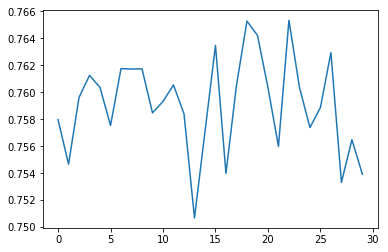

In [25]:
plt.plot(history.epoch, history.history['acc'])

In [0]:
a = np.arange(-100, 100, 0.1)
b = np.arange(-100, 100, 0.1)
C = lambda a, b: (a+b-2)**2

In [32]:
C(a, 0)

array([10404.  , 10383.61, 10363.24, ...,  9545.29,  9564.84,  9584.41])

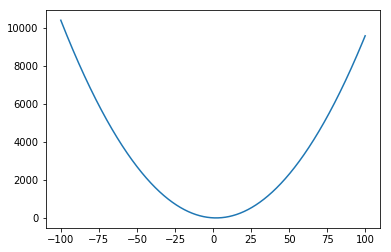

In [33]:
plt.plot(a, C(a,0))


In [35]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [0]:
epochs = history.epoch

In [37]:
type(history.history.keys())

dict_keys

In [38]:
history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [40]:
len(history.history['acc'])

30

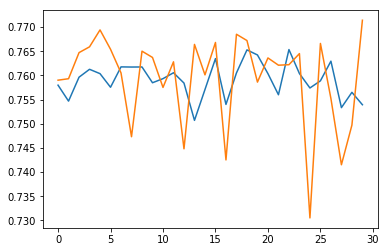

In [42]:
plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])

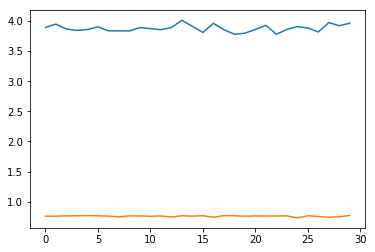

In [45]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_acc'])